# Run Qiskit circuits in DQPU

In this notebook we show how to use DQPU to simulate a quantum circuit created using the qiskit library.

#### Prerequisites

You need a NEAR wallet account created by near-cli (https://docs.near.org/tools/near-cli) using this command:

```bash
near create-account ACCOUNT_NAME.testnet --useFaucet
```

You also need a running IPFS daemon, in order to submit and retrieve quantum programs and results from the system: https://docs.ipfs.tech/install/command-line/#install-official-binary-distributions


```bash
ipfs daemon
```

After that, install dqpu and qiskit:

```bash
pip install qiskit dqpu pylatexenc
```

## Qiskit demo

First, we import needed libraries, included the dqpu qiskit backend `DQPUBackend`.

In [1]:
from qiskit import QuantumCircuit, transpile
from dqpu.backends.qiskit import DQPUBackend

Then we create a normal `QuantumCircuit` as we always do in qiskit.

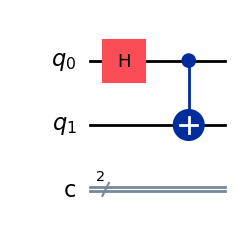

In [2]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.draw("mpl")

And now we instantiate the `DQPUBackend`; we also need to call `load_account` in order to load a NEAR wallet account (put here your NEAR account name).

In [3]:
backend = DQPUBackend()
backend.load_account("dqpu_alice.testnet")

asyncio.run() cannot be called from a running event loop


/home/dakk/.pyenv/versions/3.10.13/envs/dqpu2/lib/python3.10/site-packages/dqpu-0.2.7-py3.10.egg/dqpu/blockchain/near.py:67: RuntimeWarning: coroutine 'NearBlockchain.load_account.<locals>.v' was never awaited
  return loop.run_until_complete(v())


Now we transpile the circuit and we call the `run` method: this will send the quantum circuit along with a reward to the smart contract on the NEAR blockchain. Someone will simulate it for us, and a verifier will check for the result.

In [5]:
circ = transpile(qc, backend)
job = backend.run(circ, shots=1024)

Calling `job.status()` we wait until the job turns into `EXECUTED` status.

In [6]:
print(job.status())

JobStatus.RUNNING


And finally we get the result from the smart contract and we plot it.

In [7]:
counts = job.result().get_counts(circ)

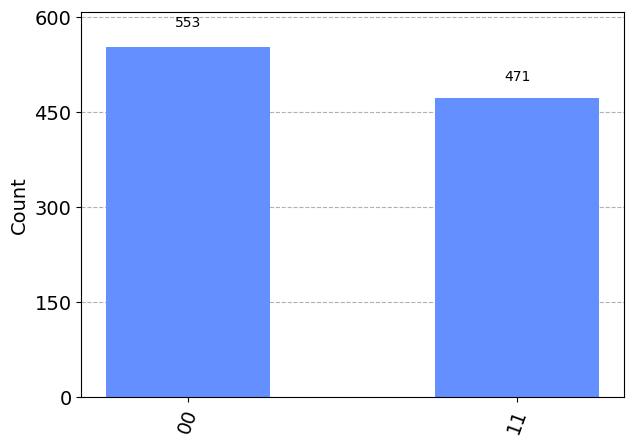

In [8]:
from qiskit.visualization import plot_histogram

plot_histogram(counts)